Text(0.5, 1.0, '16 color image')

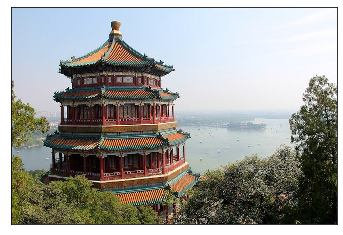

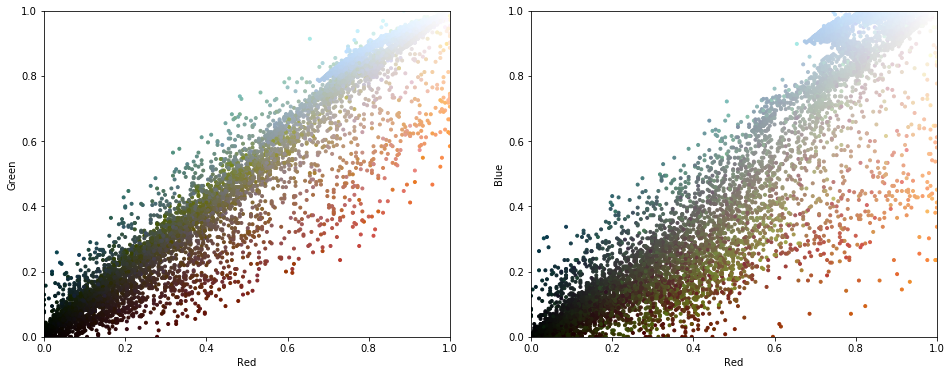

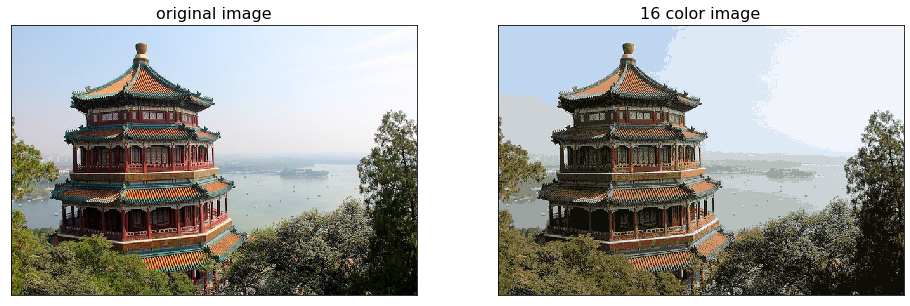

In [100]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
china=load_sample_image('china.jpg')
china
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)
data=china/255
data=data.reshape(427*640,3)
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
        r=np.random.RandomState(0)   
        i=r.permutation(data.shape[0])[:N]
        colors=colors[i]
        R,G,B=data[i].T
        fig,ax=plt.subplots(1,2,figsize=(16,6))
        ax[0].scatter(R,G,color=colors,marker=".")
        ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
        ax[1].scatter(R,B,color=colors,marker=".")
        ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
        
plot_pixels(data,title='16 million color')

from sklearn.cluster  import MiniBatchKMeans
model=MiniBatchKMeans(16)
model.fit(data)
new_colors=model.cluster_centers_[model.predict(data)]
plot_pixels(data,colors=new_colors,title='16')
china_recolored=new_colors.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(china)
ax[0].set_title('original image',size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16 color image',size=16)